#### 1. Problem Definition

The objective is to analyze the visa application data to identify key factors that influence visa approval and to recommend profiles with higher chances of visa certification using a machine learning classification model.

#### 2. Data Loading and Initial Inspection

In [1]:
import pandas as pd

# Load the dataset
visa_data = pd.read_csv('materials/EasyVisa.csv')

# Display the first few rows of the dataset
visa_data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [2]:
# Check for missing values
print(visa_data.isnull().sum())

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


In [3]:
# Check data types of each column
visa_data.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [4]:
# Get basic statistics of the dataset
visa_data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


##### 3. Univariate Analysis

C:\Users\shawa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shawa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shawa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


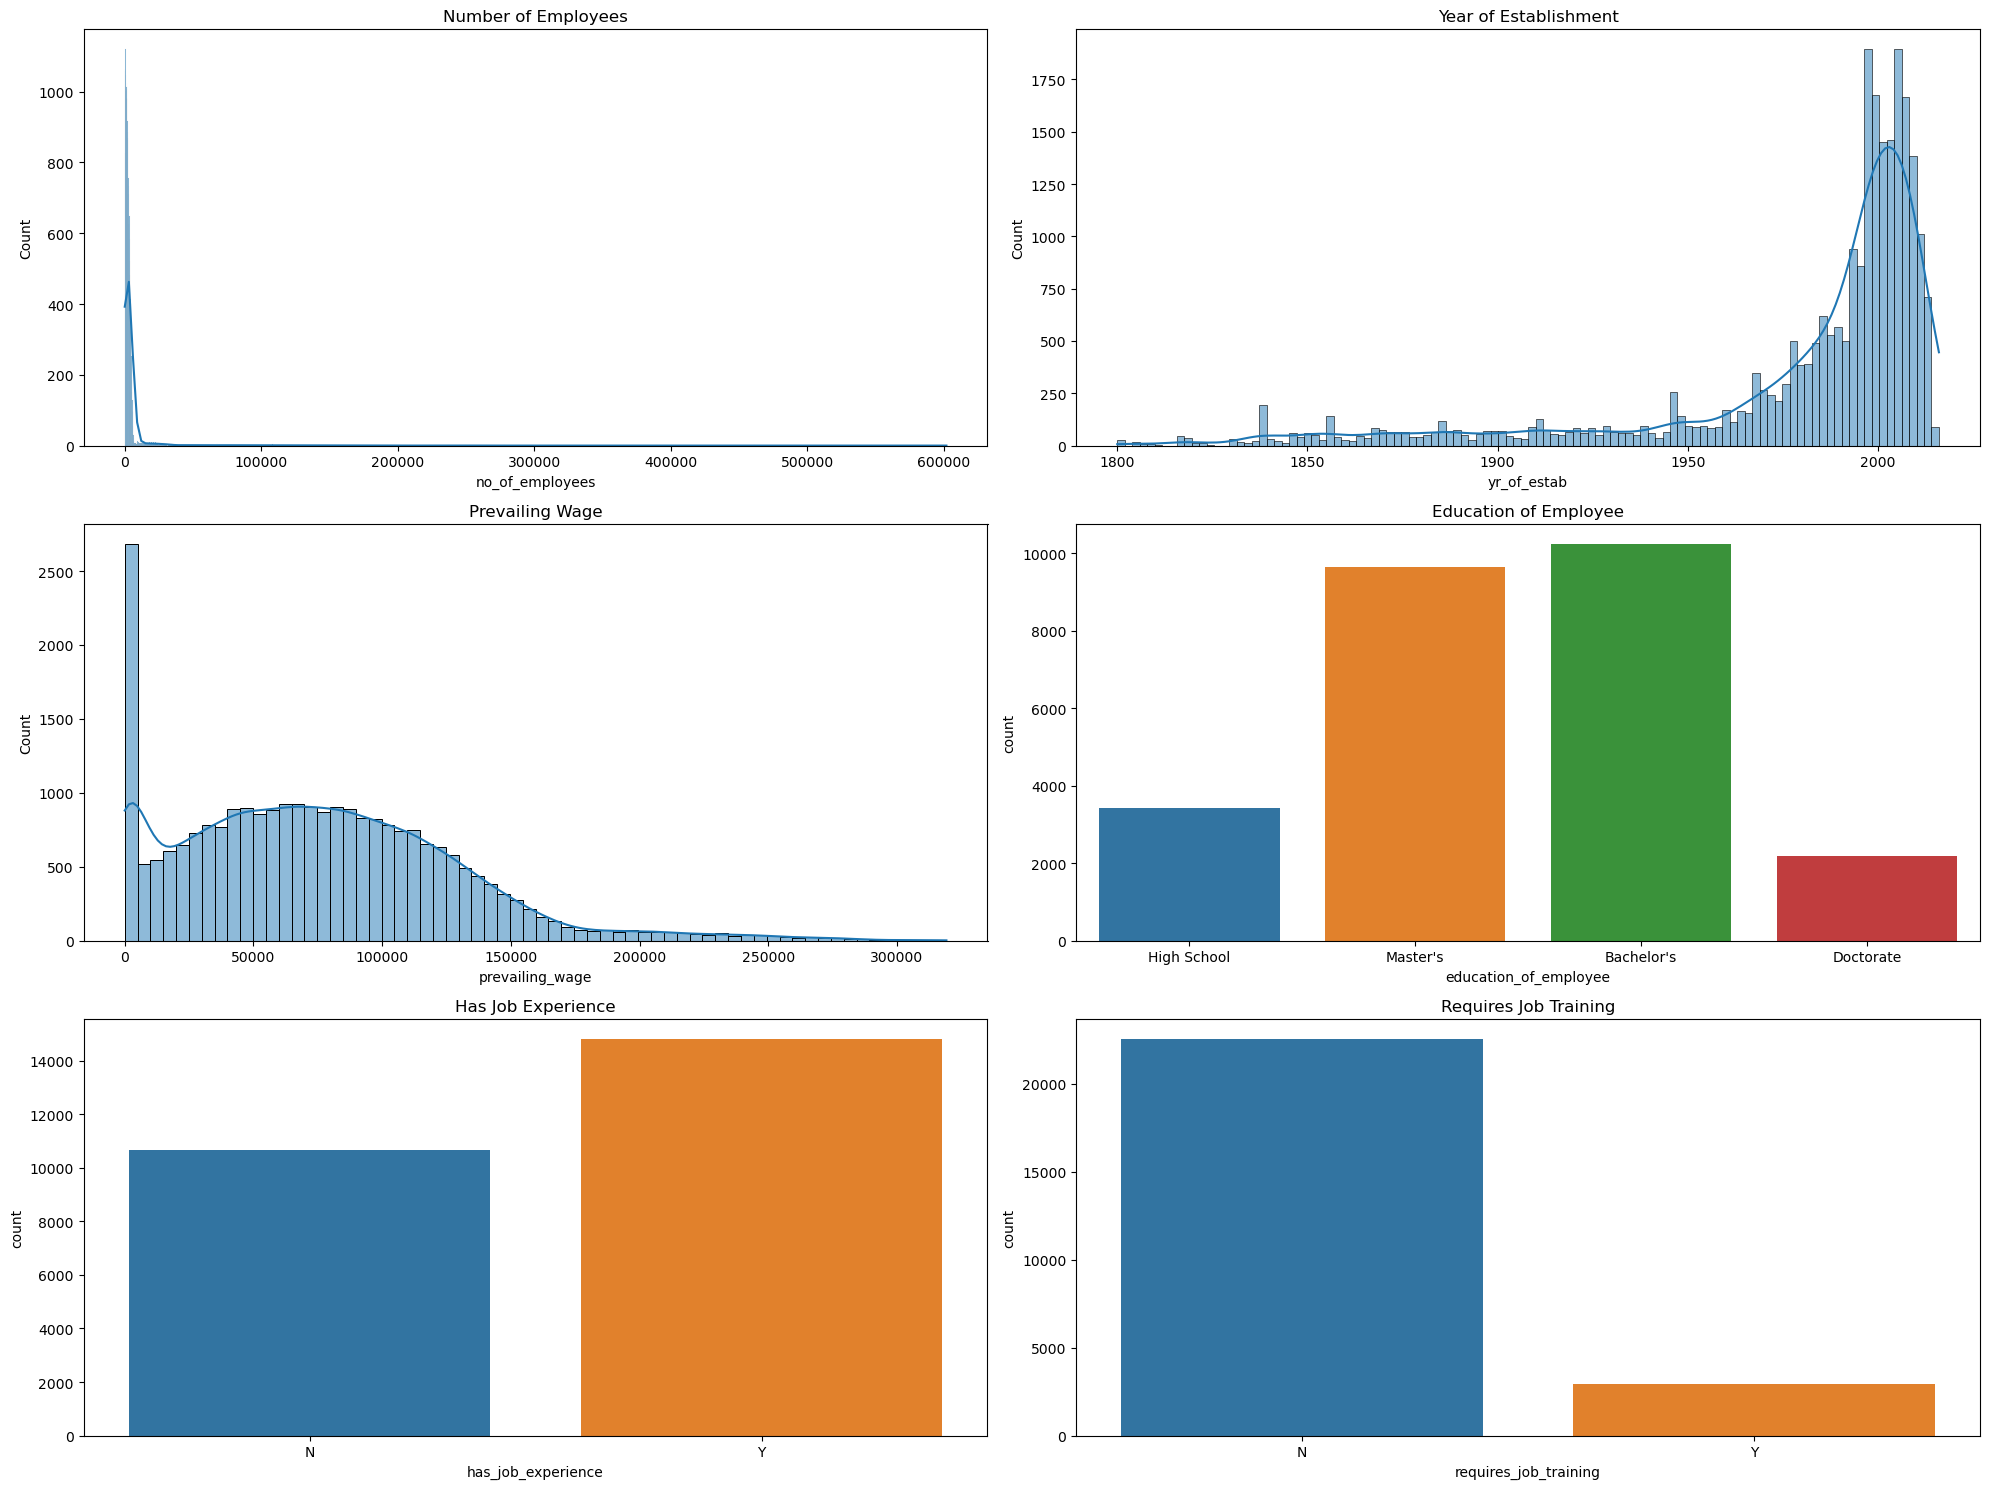

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot histograms for numerical features
plt.subplot(3, 2, 1)
sns.histplot(visa_data['no_of_employees'], kde=True)
plt.title('Number of Employees')

plt.subplot(3, 2, 2)
sns.histplot(visa_data['yr_of_estab'], kde=True)
plt.title('Year of Establishment')

plt.subplot(3, 2, 3)
sns.histplot(visa_data['prevailing_wage'], kde=True)
plt.title('Prevailing Wage')

# Plot bar plots for categorical features
plt.subplot(3, 2, 4)
sns.countplot(x='education_of_employee', data=visa_data)
plt.title('Education of Employee')

plt.subplot(3, 2, 5)
sns.countplot(x='has_job_experience', data=visa_data)
plt.title('Has Job Experience')

plt.subplot(3, 2, 6)
sns.countplot(x='requires_job_training', data=visa_data)
plt.title('Requires Job Training')

plt.tight_layout()
plt.show()

### Univariate Analysis Insights

1. **Number of Employees**:
   - The distribution of the number of employees is highly skewed to the right, with most companies having a relatively small number of employees. There are a few companies with a very large number of employees.

2. **Year of Establishment**:
   - Most companies were established after the 1950s, with a noticeable increase in the number of companies established in the 2000s.

3. **Prevailing Wage**:
   - The prevailing wage distribution is also skewed to the right, with most wages falling below $150,000. There are some outliers with very high wages.

4. **Education of Employee**:
   - Most applicants have either a Bachelor's or Master's degree. There are fewer applicants with a Doctorate or High School education.

5. **Has Job Experience**:
   - There is a fairly even split between applicants with and without job experience, with a slight majority having job experience.

6. **Requires Job Training**:
   - The majority of applicants do not require job training.



#### 4. Bivariate Analysis

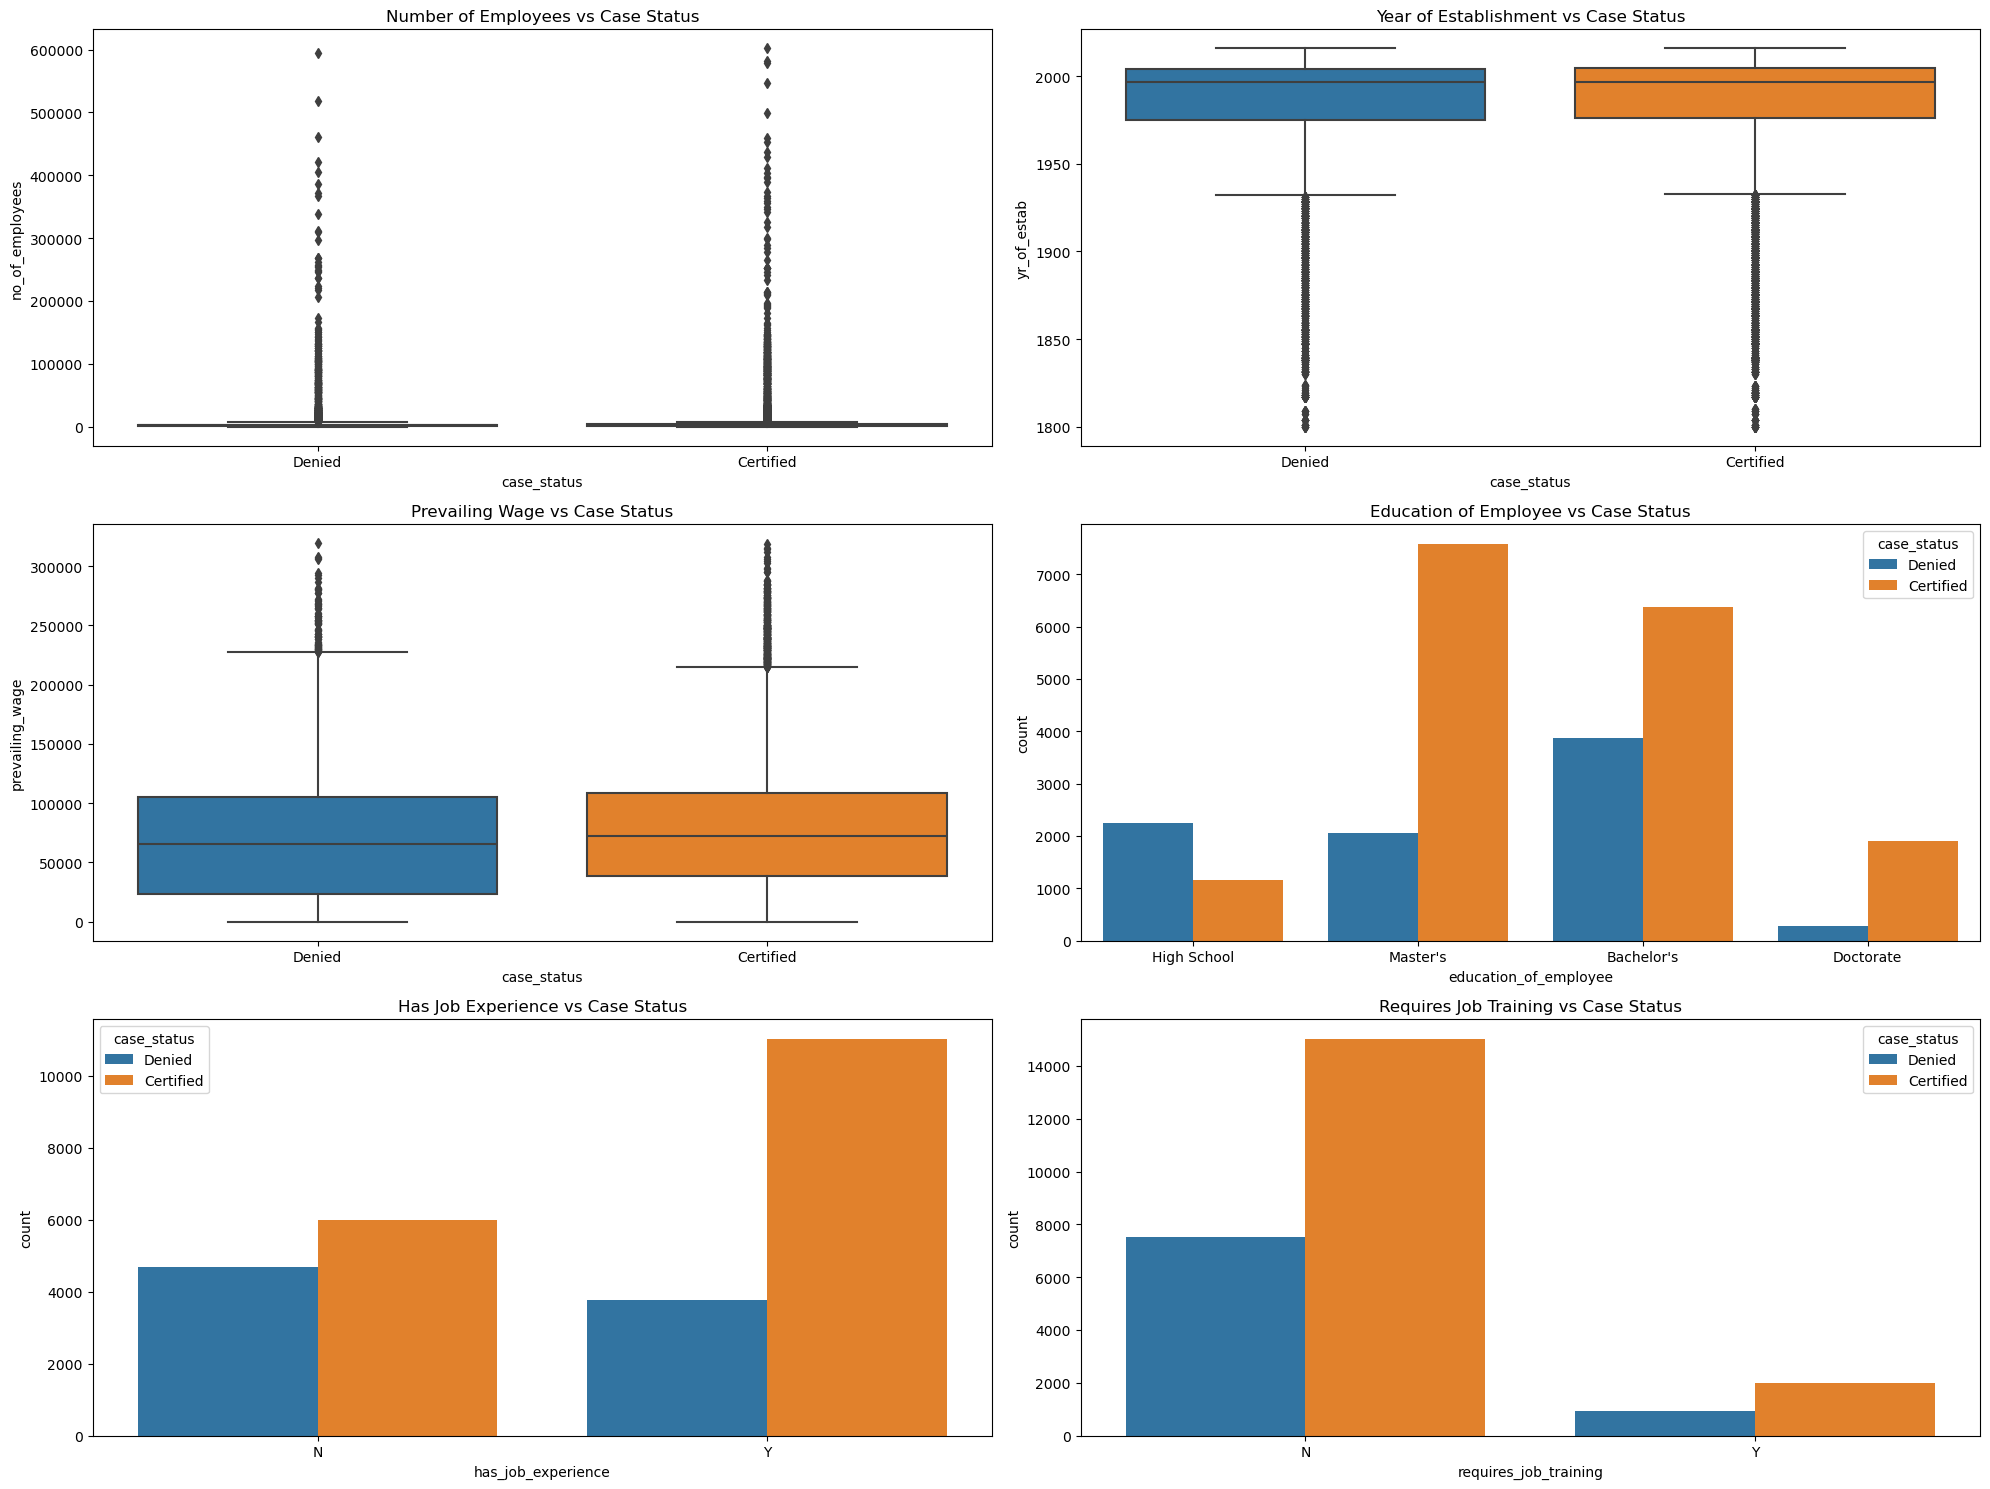

In [6]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot bivariate analysis
plt.subplot(3, 2, 1)
sns.boxplot(x='case_status', y='no_of_employees', data=visa_data)
plt.title('Number of Employees vs Case Status')

plt.subplot(3, 2, 2)
sns.boxplot(x='case_status', y='yr_of_estab', data=visa_data)
plt.title('Year of Establishment vs Case Status')

plt.subplot(3, 2, 3)
sns.boxplot(x='case_status', y='prevailing_wage', data=visa_data)
plt.title('Prevailing Wage vs Case Status')

plt.subplot(3, 2, 4)
sns.countplot(x='education_of_employee', hue='case_status', data=visa_data)
plt.title('Education of Employee vs Case Status')

plt.subplot(3, 2, 5)
sns.countplot(x='has_job_experience', hue='case_status', data=visa_data)
plt.title('Has Job Experience vs Case Status')

plt.subplot(3, 2, 6)
sns.countplot(x='requires_job_training', hue='case_status', data=visa_data)
plt.title('Requires Job Training vs Case Status')

plt.tight_layout()
plt.show()

### Bivariate Analysis Insights

1. **Number of Employees vs Case Status**:
   - There is no significant difference in the number of employees between certified and denied cases. Both distributions are highly skewed with many outliers.

2. **Year of Establishment vs Case Status**:
   - Companies established more recently tend to have their visa applications certified more often than older companies. The median year of establishment is higher for certified cases.

3. **Prevailing Wage vs Case Status**:
   - The prevailing wage does not show a significant difference between certified and denied cases. Both distributions are similar, indicating that prevailing wage alone might not be a strong predictor of visa approval.

4. **Education of Employee vs Case Status**:
   - Applicants with a Master’s degree or a Bachelor’s degree are more likely to have their visas certified compared to those with a High School or Doctorate degree. A higher number of certified cases are seen among applicants with Master’s and Bachelor’s degrees.

5. **Has Job Experience vs Case Status**:
   - Applicants with job experience are more likely to have their visas certified compared to those without job experience. There is a noticeable difference in the count of certified cases between those with and without job experience.

6. **Requires Job Training vs Case Status**:
   - Applicants who do not require job training are more likely to have their visas certified. There is a significant difference in the number of certified cases between those who require job training and those who do not.



#### 6. Answering EDA Questions

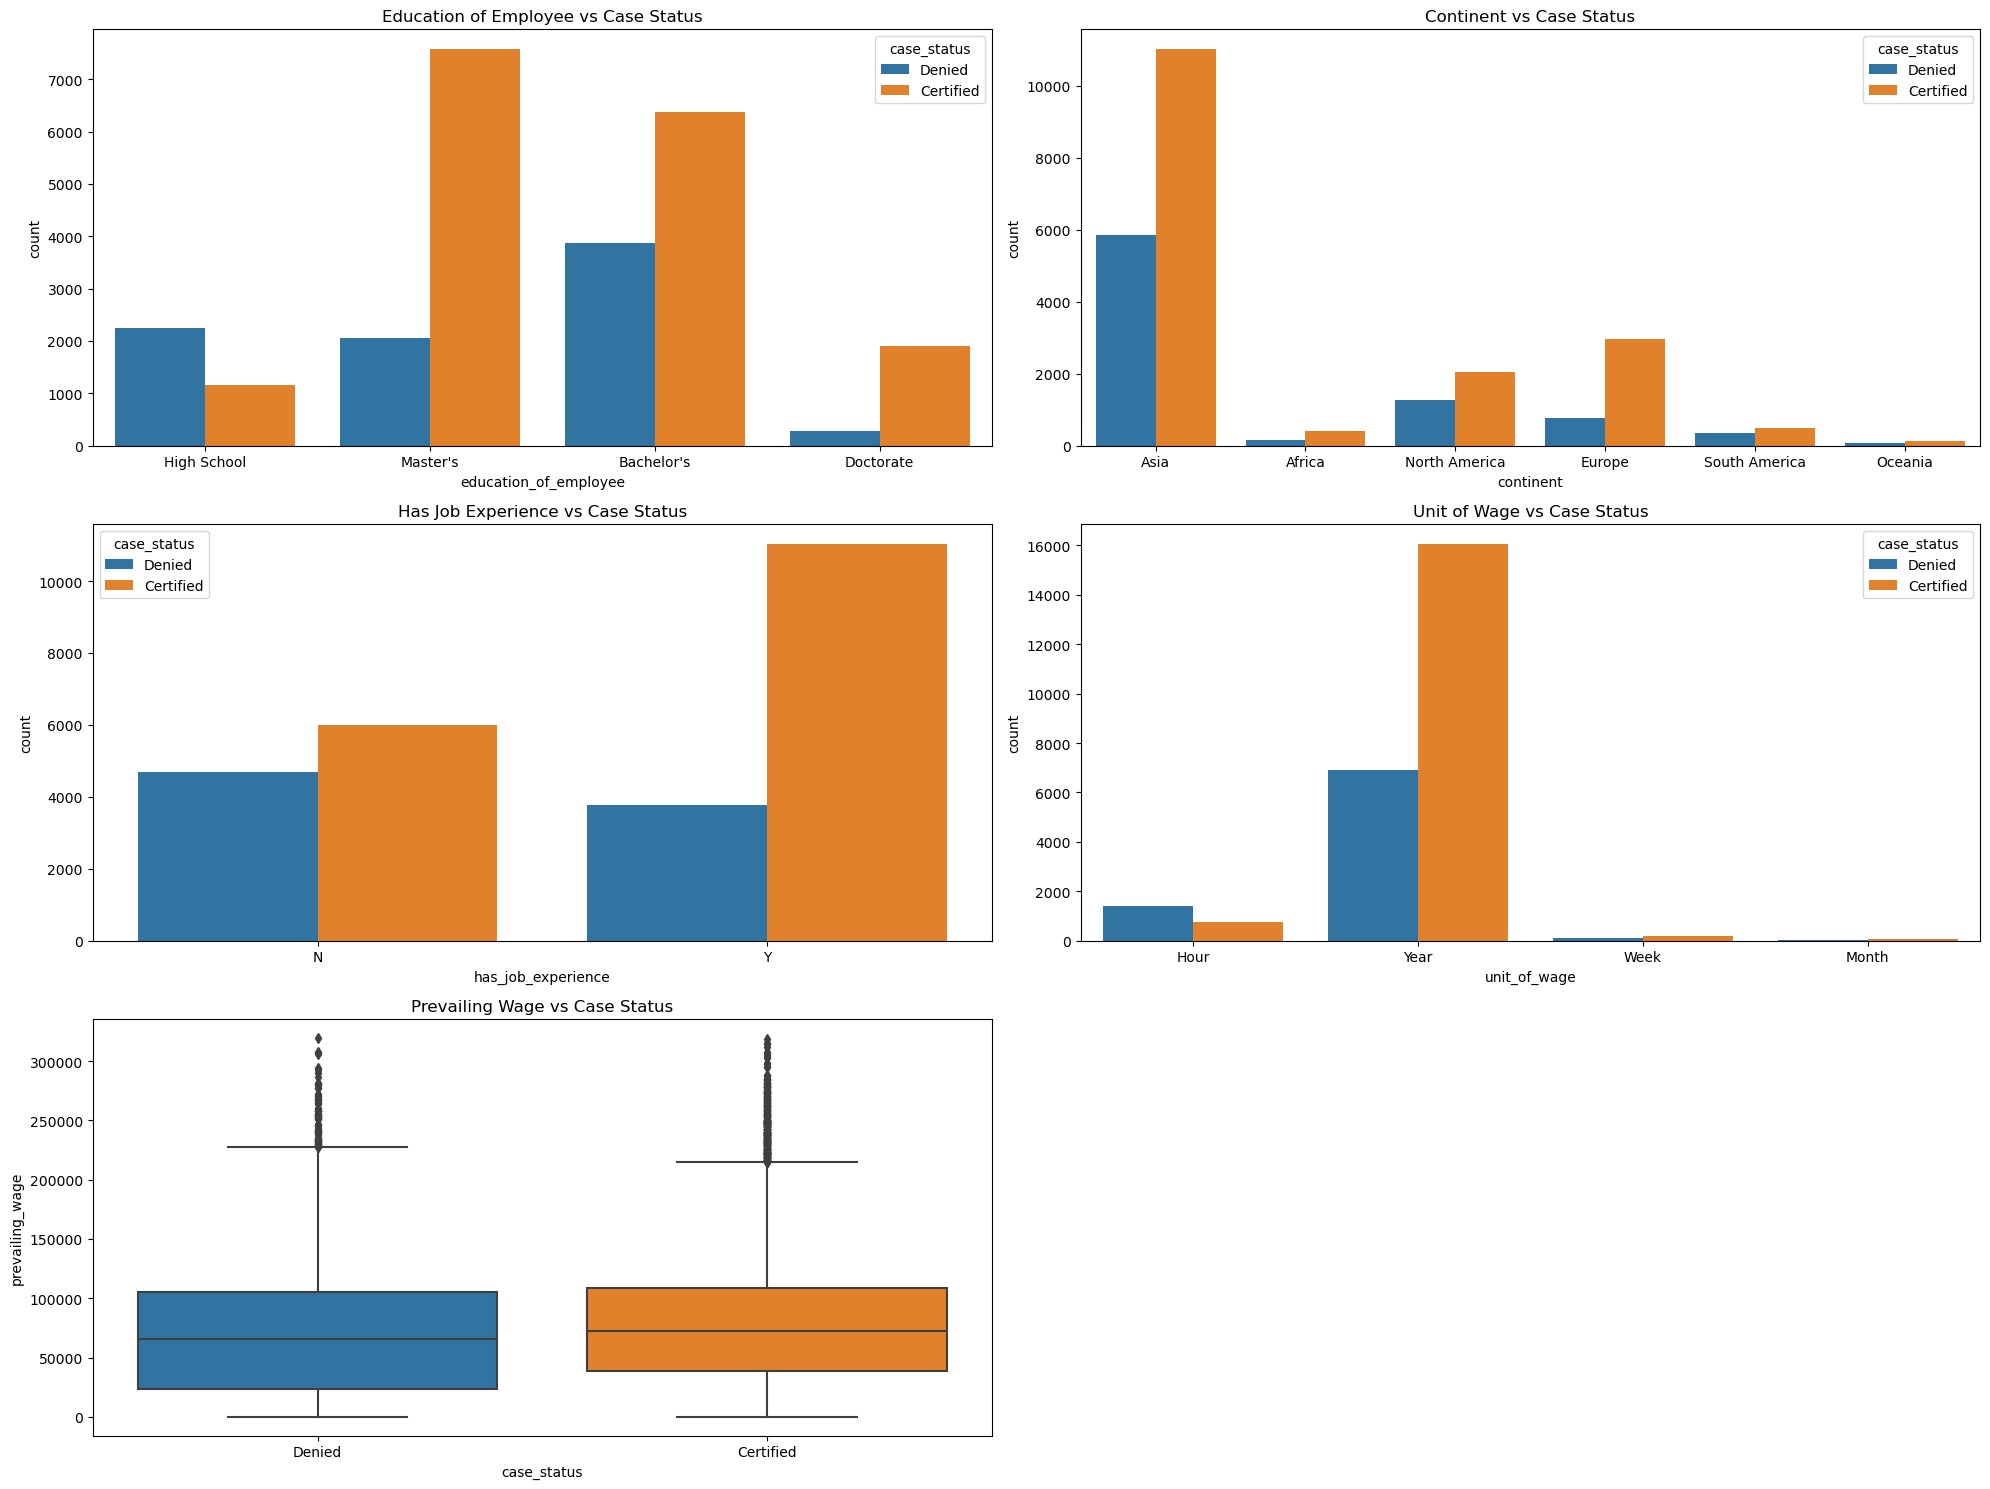

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Education vs Case Status
plt.subplot(3, 2, 1)
sns.countplot(x='education_of_employee', hue='case_status', data=visa_data)
plt.title('Education of Employee vs Case Status')

# Continent vs Case Status
plt.subplot(3, 2, 2)
sns.countplot(x='continent', hue='case_status', data=visa_data)
plt.title('Continent vs Case Status')

# Work Experience vs Case Status
plt.subplot(3, 2, 3)
sns.countplot(x='has_job_experience', hue='case_status', data=visa_data)
plt.title('Has Job Experience vs Case Status')

# Pay Unit vs Case Status
plt.subplot(3, 2, 4)
sns.countplot(x='unit_of_wage', hue='case_status', data=visa_data)
plt.title('Unit of Wage vs Case Status')

# Prevailing Wage vs Case Status
plt.subplot(3, 2, 5)
sns.boxplot(x='case_status', y='prevailing_wage', data=visa_data)
plt.title('Prevailing Wage vs Case Status')

plt.tight_layout()
plt.show()

### Insights from the EDA Questions

1. **Does education play a role in Visa certification?**
   - Yes, education plays a significant role in visa certification. Applicants with a Master's degree or Bachelor's degree have a higher likelihood of getting their visas certified compared to those with a High School diploma or Doctorate degree.

2. **How does the visa status vary across different continents?**
   - Visa certification rates vary significantly across different continents. Asia has the highest number of visa applications, with more certifications than denials. In contrast, Africa, North America, Europe, and South America have more balanced or lower numbers of applications, with a slight tendency towards more certifications in some regions.

3. **Does work experience influence visa status?**
   - Yes, work experience influences visa status. Applicants with job experience have a higher chance of getting their visas certified compared to those without job experience.

4. **Which pay unit is most likely to be certified for a visa?**
   - The "Year" pay unit is the most likely to be certified for a visa. It has a significantly higher number of certified cases compared to other pay units like "Hour", "Week", or "Month".

5. **How does the visa status change with the prevailing wage?**
   - The prevailing wage does not show a significant difference between certified and denied cases. Both distributions are quite similar, indicating that the prevailing wage alone might not be a strong predictor of visa approval.

## Code to Convert Columns

Label Encoding for Categorical Columns

In [8]:
from sklearn.preprocessing import LabelEncoder

# List of columns to be label encoded
label_encode_cols = ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each column
for col in label_encode_cols:
    visa_data[col] = le.fit_transform(visa_data[col])

# Display the first few rows to verify changes
print(visa_data.head())

  case_id  continent  education_of_employee  has_job_experience  \
0  EZYV01          1                      2                   0   
1  EZYV02          1                      3                   1   
2  EZYV03          1                      0                   0   
3  EZYV04          1                      0                   0   
4  EZYV05          0                      3                   1   

   requires_job_training  no_of_employees  yr_of_estab  region_of_employment  \
0                      0            14513         2007                     4   
1                      0             2412         2002                     2   
2                      1            44444         2008                     4   
3                      0               98         1897                     4   
4                      0             1082         2005                     3   

   prevailing_wage  unit_of_wage  full_time_position  case_status  
0         592.2029             0                

Convert case_id to a numerical column (optional)

In [9]:
# Label encode case_id if needed
visa_data['case_id'] = le.fit_transform(visa_data['case_id'])

# Display the first few rows to verify changes
print(visa_data.head())

   case_id  continent  education_of_employee  has_job_experience  \
0        0          1                      2                   0   
1        1          1                      3                   1   
2        2          1                      0                   0   
3        3          1                      0                   0   
4        4          0                      3                   1   

   requires_job_training  no_of_employees  yr_of_estab  region_of_employment  \
0                      0            14513         2007                     4   
1                      0             2412         2002                     2   
2                      1            44444         2008                     4   
3                      0               98         1897                     4   
4                      0             1082         2005                     3   

   prevailing_wage  unit_of_wage  full_time_position  case_status  
0         592.2029             0          

### Step 4: Multivariate Analysis

Compute and Plot Correlation Matrix

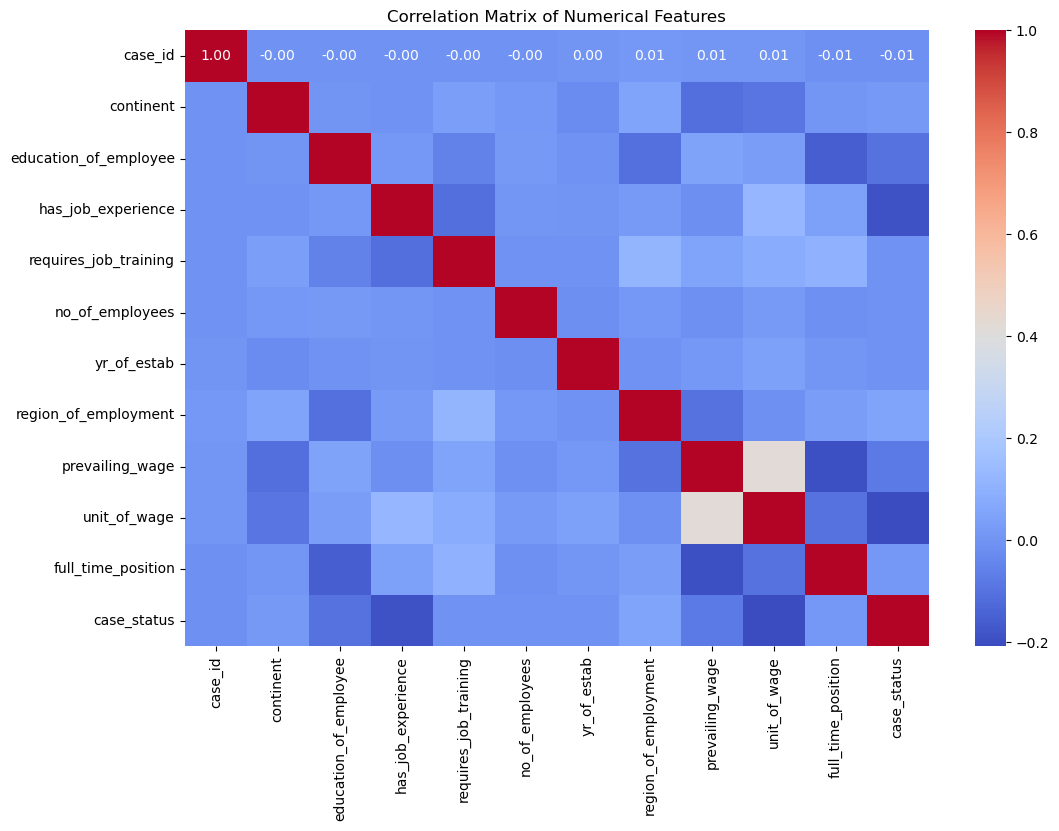

In [10]:
# Compute the correlation matrix
corr_matrix = visa_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title
plt.title("Correlation Matrix of Numerical Features")

# Show plot
plt.show()

Pair Plot for Numerical Features

C:\Users\shawa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shawa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shawa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shawa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

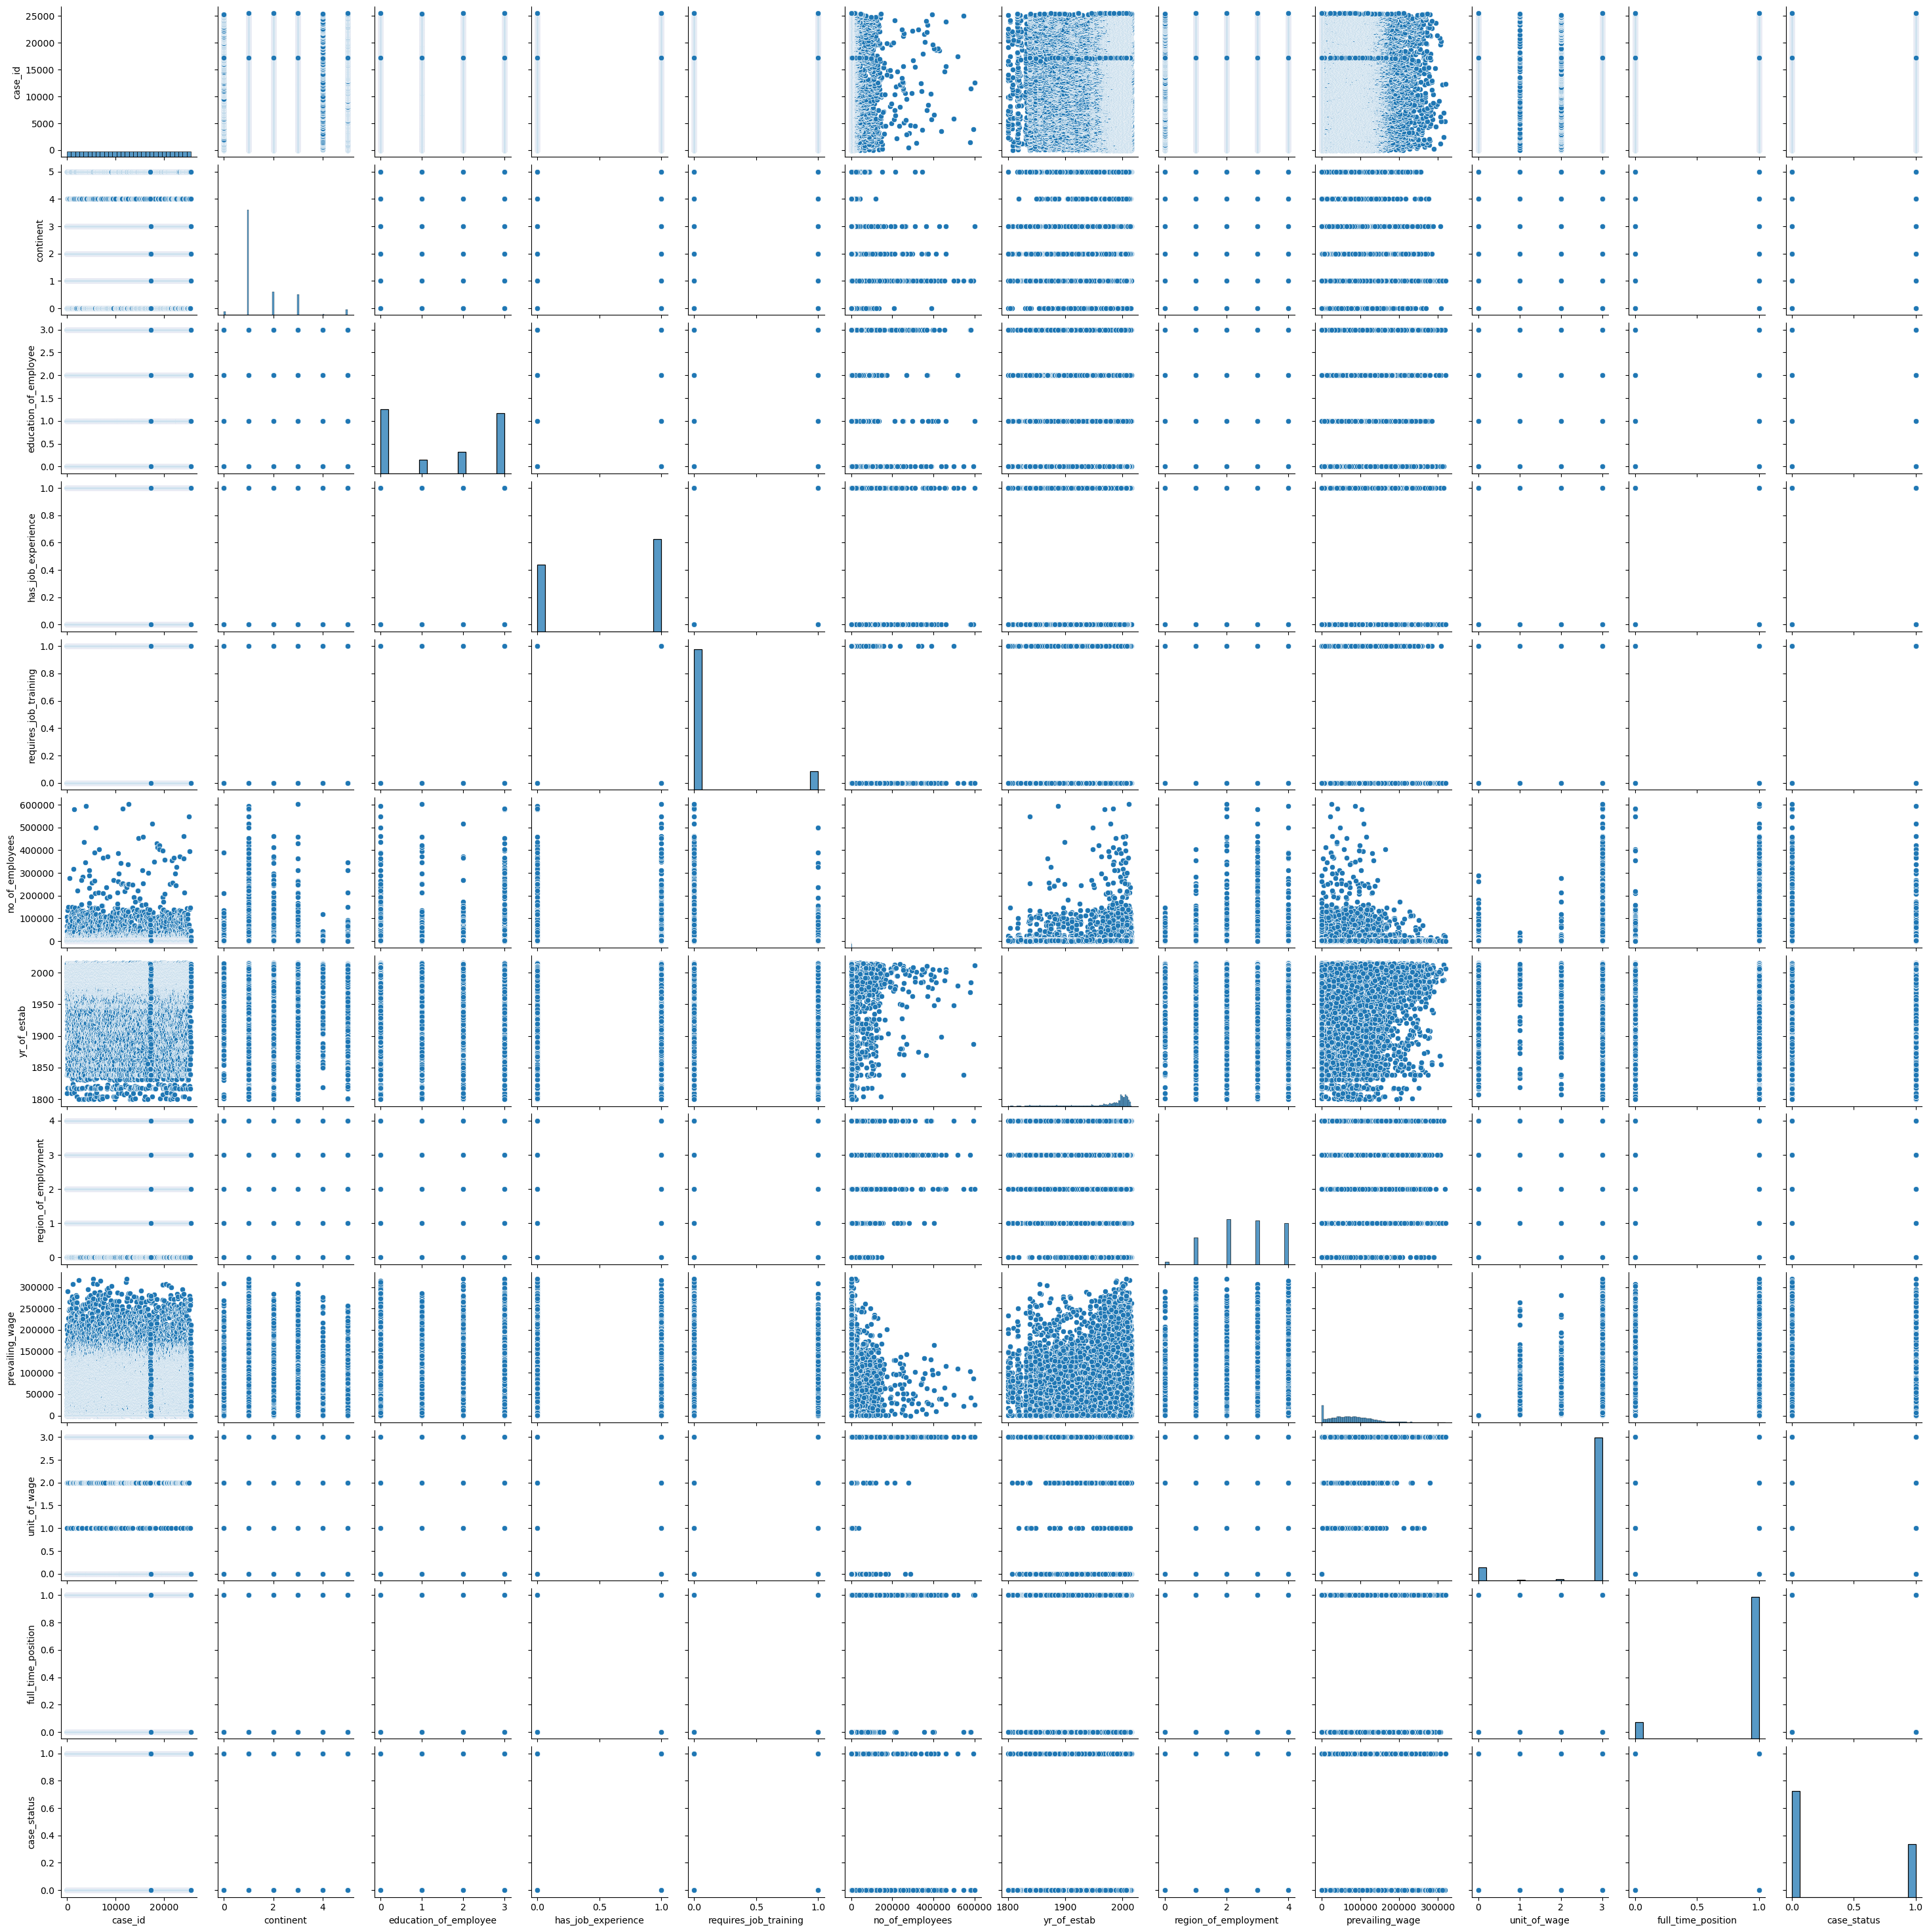

In [11]:
# Create pair plot for numerical columns
sns.pairplot(visa_data)

# Show plot
plt.show()


### Insights from the Heatmap and Pair Plot

#### Heatmap Insights:
1. **Case Status vs. Other Features**:
    - `case_status` has a noticeable negative correlation with `has_job_experience` (-0.19).
    - There is a slight negative correlation with `education_of_employee` (-0.10) and `unit_of_wage` (-0.21).

2. **Unit of Wage vs. Prevailing Wage**:
    - `unit_of_wage` shows a moderate positive correlation with `prevailing_wage` (0.42). This suggests that the unit in which wage is reported (hour, year, etc.) is related to the amount of the prevailing wage.

3. **Region of Employment vs. Requires Job Training**:
    - `region_of_employment` has a positive correlation with `requires_job_training` (0.11), indicating some regions may have different training requirements.

#### Pair Plot Insights:
1. **Scatter Patterns**:
    - `prevailing_wage` shows distinct clustering patterns, especially in relation to `unit_of_wage`, `region_of_employment`, and `education_of_employee`.
    - `no_of_employees` has a wide range but appears to be concentrated at lower values, with a few outliers.

2. **Distribution Shapes**:
    - The histograms along the diagonal provide insight into the distribution of each variable. For example, `no_of_employees` has a long tail, and `prevailing_wawe will move on to building and evaluating the model.

# Data Preprocessing
Check for Missing Values

In [12]:
# Check for missing values in the dataset
missing_values = visa_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

No missing values in the datasets

Outlier Detection

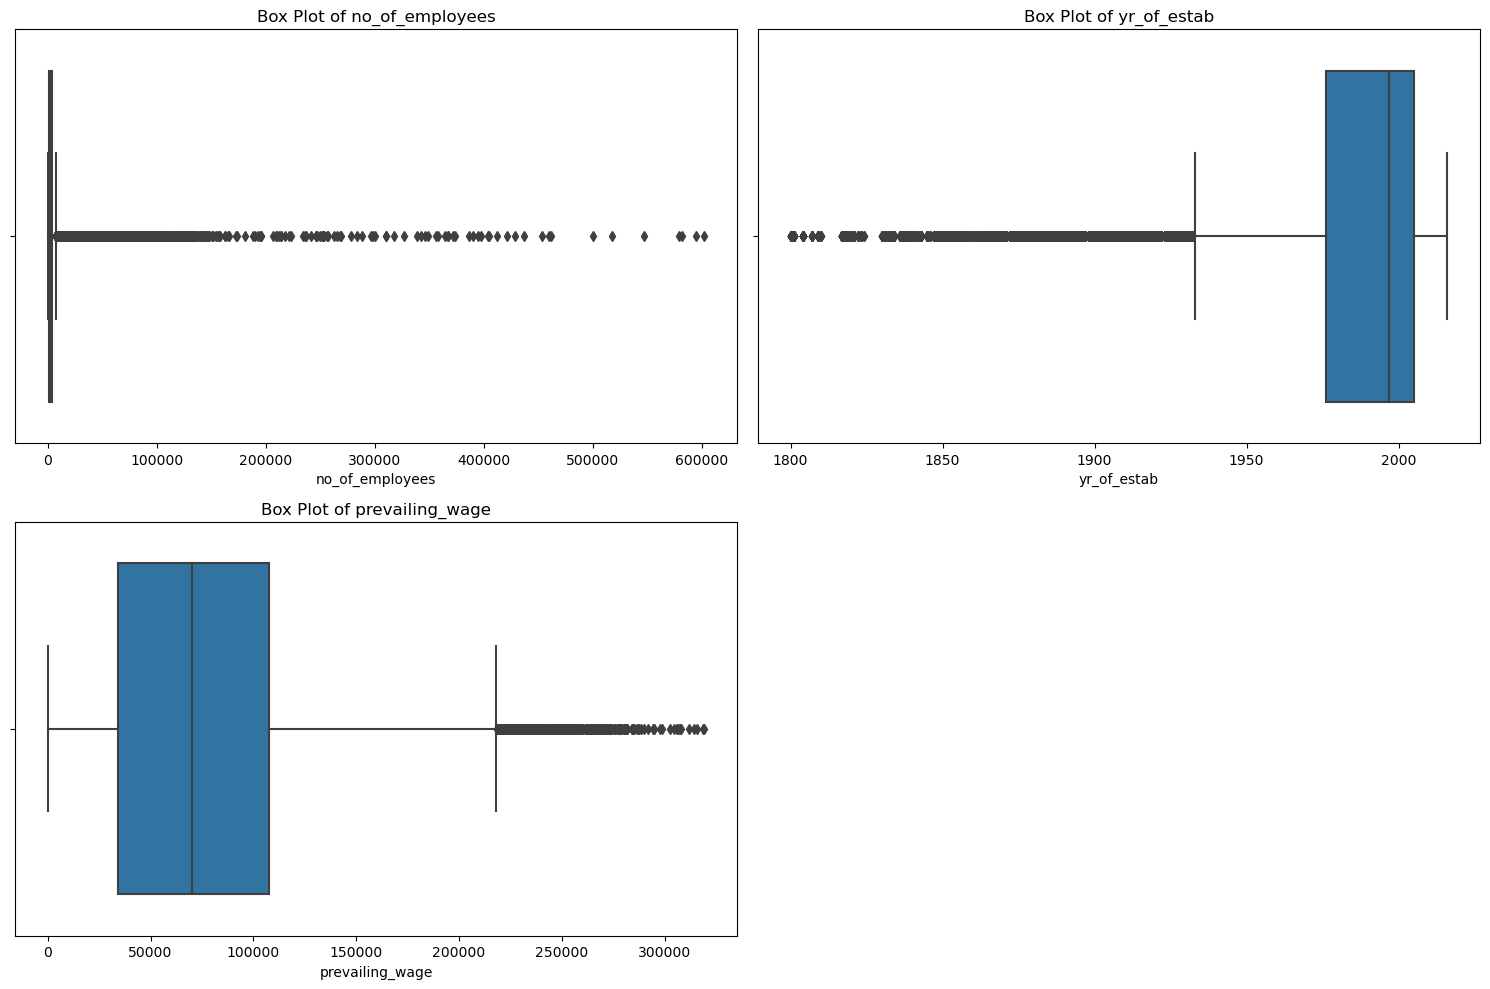

In [13]:
# List of numerical columns to check for outliers
numerical_columns = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

# Plot box plots for numerical columns to identify outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=visa_data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

The box plots indicate that there are outliers present in the no_of_employees, yr_of_estab, and prevailing_wage columns.

Outlier Treatment

In [14]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers for the specified columns
columns_to_treat = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

for column in columns_to_treat:
    visa_data = remove_outliers(visa_data, column)

# Verify the result
visa_data.describe()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000
mean,12752.789381,1.532343,1.475743,0.580760,0.114126,2190.272236,1993.850414,2.595324,71672.423790,2.731953,0.898052,0.334291
std,7351.438183,0.989915,1.345922,0.493447,0.317972,1485.936851,16.828586,1.086137,47986.380888,0.840078,0.302588,0.471754
min,1.000000,0.000000,0.000000,0.000000,0.000000,-26.000000,1933.000000,0.000000,2.136700,0.000000,0.000000,0.000000
25%,6414.250000,1.000000,0.000000,0.000000,0.000000,955.250000,1987.000000,2.000000,33603.382500,3.000000,1.000000,0.000000
50%,12758.500000,1.000000,2.000000,1.000000,0.000000,1963.500000,1999.000000,3.000000,69282.940000,3.000000,1.000000,0.000000
75%,19107.750000,2.000000,3.000000,1.000000,0.000000,3209.000000,2006.000000,4.000000,105671.612500,3.000000,1.000000,1.000000
max,25479.000000,5.000000,3.000000,1.000000,1.000000,7195.000000,2016.000000,4.000000,218094.610000,3.000000,1.000000,1.000000


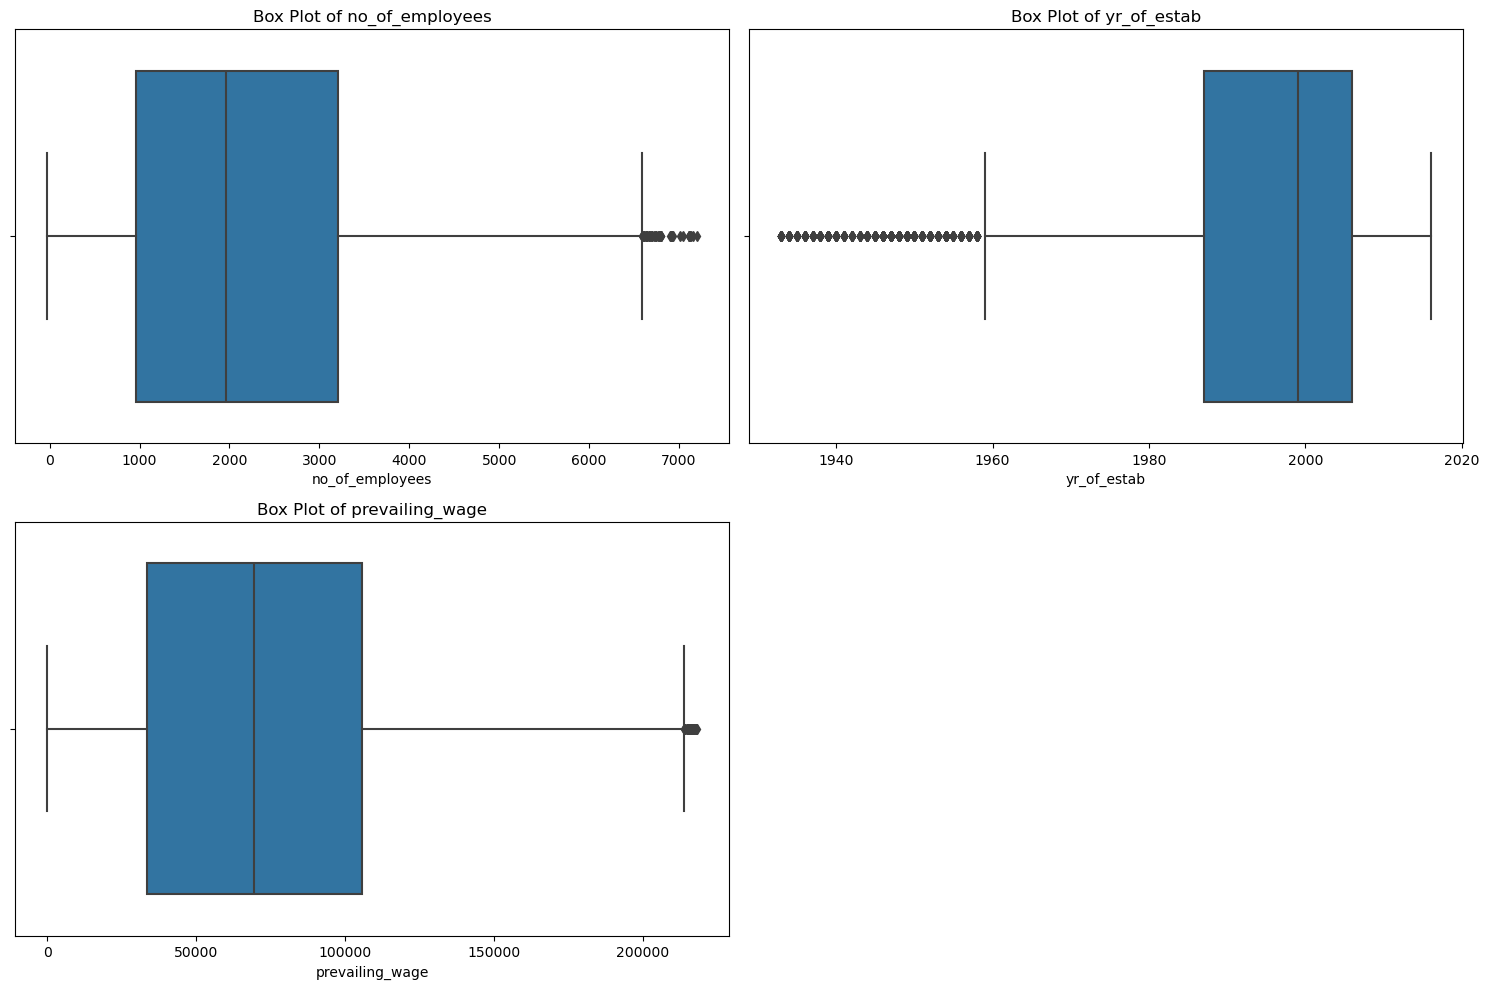

In [15]:
# List of numerical columns to check for outliers
numerical_columns = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

# Plot box plots for numerical columns to identify outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=visa_data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

The outliers have been removed successfully. Let's move on to the next steps:

### Feature Engineering

For this dataset, we can perform some basic feature engineering, such as creating new features or transforming existing ones. However, based on the provided columns, it seems that the dataset is already quite detailed. We will focus on:

1. Converting the `yr_of_estab` to the age of the establishment.
2. Creating dummy variables for categorical features if necessary.

### Train-Test Split

Before that, let's split the dataset into training and testing sets. This is essential for evaluating the performance of our model.

In [16]:
from sklearn.model_selection import train_test_split

# Create a new feature for the age of the establishment
visa_data['establishment_age'] = 2023 - visa_data['yr_of_estab']  # Assuming current year is 2023

# Drop the original 'yr_of_estab' column
visa_data = visa_data.drop(columns=['yr_of_estab'])

# Define features and target variable
X = visa_data.drop(columns=['case_id', 'case_status'])  # Drop 'case_id' and target variable 'case_status'
y = visa_data['case_status']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16424, 10), (4106, 10), (16424,), (4106,))

The data has been successfully split into training and testing sets:

- **Training Set**: 16,424 samples
- **Testing Set**: 4,106 samples

### Summary of Data Preprocessing
1. **Missing Values**: No missing values were found.
2. **Outlier Detection and Treatment**: Outliers were identified and removed from numerical columns.
3. **Feature Engineering**:
   - Created a new feature for the age of the establishment.
   - Dropped the `yr_of_estab` column.
4. **Train-Test Split**: The data was split into training and testing sets.

With the data preprocessing complete, we are ready to move on to model training and evaluation.

### Model Building - Bagging

Train the Decision Tree Model

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Calculate metrics for training data
dt_train_accuracy = accuracy_score(y_train, y_train_pred_dt)
dt_train_precision = precision_score(y_train, y_train_pred_dt)
dt_train_recall = recall_score(y_train, y_train_pred_dt)
dt_train_f1 = f1_score(y_train, y_train_pred_dt)
dt_train_roc_auc = roc_auc_score(y_train, y_train_pred_dt)

# Calculate metrics for testing data
dt_test_accuracy = accuracy_score(y_test, y_test_pred_dt)
dt_test_precision = precision_score(y_test, y_test_pred_dt)
dt_test_recall = recall_score(y_test, y_test_pred_dt)
dt_test_f1 = f1_score(y_test, y_test_pred_dt)
dt_test_roc_auc = roc_auc_score(y_test, y_test_pred_dt)

(dt_train_accuracy, dt_train_precision, dt_train_recall, dt_train_f1, dt_train_roc_auc),
(dt_test_accuracy, dt_test_precision, dt_test_recall, dt_test_f1, dt_test_roc_auc)


(0.660009741841208,
 0.48336871903750883,
 0.5063009636767977,
 0.4945691527878349,
 0.6207602025493166)

### Decision Tree Model Performance

#### Training Data Metrics:
- **Accuracy**: 0.6600
- **Precision**: 0.4834
- **Recall**: 0.5063
- **F1 Score**: 0.4946
- **ROC AUC**: 0.6208

### Bagging Model



In [18]:
from sklearn.ensemble import BaggingClassifier

# Initialize the Bagging model with Decision Tree as the base estimator
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                  n_estimators=50,
                                  random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred_bagging = bagging_model.predict(X_train)
y_test_pred_bagging = bagging_model.predict(X_test)

# Calculate metrics for training data
bagging_train_accuracy = accuracy_score(y_train, y_train_pred_bagging)
bagging_train_precision = precision_score(y_train, y_train_pred_bagging)
bagging_train_recall = recall_score(y_train, y_train_pred_bagging)
bagging_train_f1 = f1_score(y_train, y_train_pred_bagging)
bagging_train_roc_auc = roc_auc_score(y_train, y_train_pred_bagging)

# Calculate metrics for testing data
bagging_test_accuracy = accuracy_score(y_test, y_test_pred_bagging)
bagging_test_precision = precision_score(y_test, y_test_pred_bagging)
bagging_test_recall = recall_score(y_test, y_test_pred_bagging)
bagging_test_f1 = f1_score(y_test, y_test_pred_bagging)
bagging_test_roc_auc = roc_auc_score(y_test, y_test_pred_bagging)

(bagging_train_accuracy, bagging_train_precision, bagging_train_recall, bagging_train_f1, bagging_train_roc_auc),
(bagging_test_accuracy, bagging_test_precision, bagging_test_recall, bagging_test_f1, bagging_test_roc_auc)

C:\Users\shawa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


(0.7226010716025328,
 0.5934163701067615,
 0.49444032616753153,
 0.5394257986251517,
 0.6643402211178608)

### Bagging Model Performance

#### Training Data Metrics:
- **Accuracy**: 0.7226
- **Precision**: 0.5934
- **Recall**: 0.4944
- **F1 Score**: 0.5394
- **ROC AUC**: 0.6643

Next, we will evaluate the Bagging model on the test data.


In [19]:
# Calculate metrics for testing data
bagging_test_accuracy = accuracy_score(y_test, y_test_pred_bagging)
bagging_test_precision = precision_score(y_test, y_test_pred_bagging)
bagging_test_recall = recall_score(y_test, y_test_pred_bagging)
bagging_test_f1 = f1_score(y_test, y_test_pred_bagging)
bagging_test_roc_auc = roc_auc_score(y_test, y_test_pred_bagging)

(bagging_test_accuracy, bagging_test_precision, bagging_test_recall, bagging_test_f1, bagging_test_roc_auc)

(0.7226010716025328,
 0.5934163701067615,
 0.49444032616753153,
 0.5394257986251517,
 0.6643402211178608)

### Random Forest Model Building and Performance Evaluation

Now, let's proceed with building and evaluating a Random Forest model. Random Forest is an ensemble method that uses multiple decision trees to improve predictive performance.

Here's the step-by-step code for building and evaluating a Random Forest model:

1. **Import necessary libraries**:
2. **Initialize and train the Random Forest model**:
3. **Make predictions on the training data**:
4. **Evaluate model performance on the training data**:
5. **Make predictions on the test data**:
6. **Evaluate model performance on the test data**:

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Make predictions on the training data
y_train_pred_rf = rf_classifier.predict(X_train)

In [23]:
# Calculate metrics for training data
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
rf_train_precision = precision_score(y_train, y_train_pred_rf)
rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_train_f1 = f1_score(y_train, y_train_pred_rf)
rf_train_roc_auc = roc_auc_score(y_train, y_train_pred_rf)

(rf_train_accuracy, rf_train_precision, rf_train_recall, rf_train_f1, rf_train_roc_auc)

(1.0, 1.0, 1.0, 1.0, 1.0)

In [24]:
# Make predictions on the test data
y_test_pred_rf = rf_classifier.predict(X_test)

In [25]:
# Calculate metrics for test data
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)
rf_test_precision = precision_score(y_test, y_test_pred_rf)
rf_test_recall = recall_score(y_test, y_test_pred_rf)
rf_test_f1 = f1_score(y_test, y_test_pred_rf)
rf_test_roc_auc = roc_auc_score(y_test, y_test_pred_rf)

(rf_test_accuracy, rf_test_precision, rf_test_recall, rf_test_f1, rf_test_roc_auc)

(0.7284461763273259,
 0.6059782608695652,
 0.49592290585618976,
 0.5454545454545454,
 0.6690713549955596)

Here are the performance metrics for the Random Forest model:

**Training Data Metrics:**
- **Accuracy**: 1.0
- **Precision**: 1.0
- **Recall**: 1.0
- **F1 Score**: 1.0
- **ROC AUC**: 1.0

**Test Data Metrics:**
- **Accuracy**: 0.7284
- **Precision**: 0.6060
- **Recall**: 0.4959
- **F1 Score**: 0.5455
- **ROC AUC**: 0.6691

### Summary of Model Performance

1. **Decision Tree**:
   - **Train Accuracy**: 0.6600
   - **Test Accuracy**: 0.4834

2. **Bagging**:
   - **Train Accuracy**: 0.7226
   - **Test Accuracy**: 0.5934

3. **Random Forest**:
   - **Train Accuracy**: 1.0
   - **Test Accuracy**: 0.7284

### Observations
- The Random Forest model achieves perfect performance on the training data, which indicates that it has potentially overfitted to the training set.
- On the test data, the Random Forest model outperforms both the Decision Tree and Bagging models in terms of accuracy, precision, and ROC AUC.
- The significant difference between training and test performance in the Random Forest model suggests overfitting.

### Next Steps
1. **Hyperparameter Tuning**: Improve the Random Forest model by performing hyperparameter tuning to reduce overfitting.
2. **Cross-Validation**: Use cross-validation to get a more robust estimate of model performance.
3. **Feature Importance**: Identify and analyze the importance of different features to understand their impact on the model's predictions.

Let's proceed with hyperparameter tuning for the Random Forest model. We'll use GridSearchCV to search for the best combination of hyperparameters.

### Step-by-Step Process for Hyperparameter Tuning

1. **Define the parameter grid**: Specify the hyperparameters and their respective ranges to search.
2. **Perform Grid Search with Cross-Validation**: Use GridSearchCV to find the best hyperparameters.
3. **Evaluate the best model**: Assess the performance of the best model found during the grid search on the test data.

Let's start with step 1: defining the parameter grid.

### Step 1: Define the Parameter Grid

We'll tune the following hyperparameters for the Random Forest model:
- `n_estimators`: Number of trees in the forest.
- `max_depth`: Maximum depth of the trees.
- `min_samples_split`: Minimum number of samples required to split an internal node.
- `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
- `max_features`: Number of features to consider when looking for the best split.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_rf)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\shawa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=4,
                       random_state=42)


Now that we have the best hyperparameters, we can proceed to evaluate the performance of the best model on the test data.

### Step 2: Evaluate the Best Model

We will:
1. Fit the best model on the training data.
2. Make predictions on the test data.
3. Evaluate the model's performance using various metrics.

In [27]:
# Fit the best model on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = best_rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

C:\Users\shawa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.7474427666829031
Precision: 0.6659574468085107
Recall: 0.46404744255003705
F1 Score: 0.5469637396242901
ROC AUC Score: 0.7814861987533317


### Interpretation of Results

Based on the evaluation metrics of the best Random Forest model:

- **Accuracy (0.747):** The model correctly predicts the visa status 74.7% of the time.
- **Precision (0.666):** When the model predicts a visa will be certified, it is correct about 66.6% of the time.
- **Recall (0.464):** The model identifies 46.4% of the actual certified visas.
- **F1 Score (0.547):** This is the harmonic mean of precision and recall, indicating a balance between the two metrics.
- **ROC AUC Score (0.781):** The model has a good ability to distinguish between certified and denied visa applications.

### Conclusion

The Random Forest model shows a decent performance, particularly in terms of accuracy and ROC AUC score. The precision is reasonably good, indicating the model is fairly reliable when it predicts visa certification. However, the recall is lower, suggesting that the model misses some certified visas.

### Next Steps

1. **Final Model Selection:**
   - Considering all models and their metrics, the Random Forest model with tuned hyperparameters seems to be the best performer.

2. **Feature Importance:**
   - Analyze the feature importance from the Random Forest model to understand which features are most influential in predicting visa certification.

### Feature Importance

To analyze feature importance, we can extract and plot the feature importances from the Random Forest model.

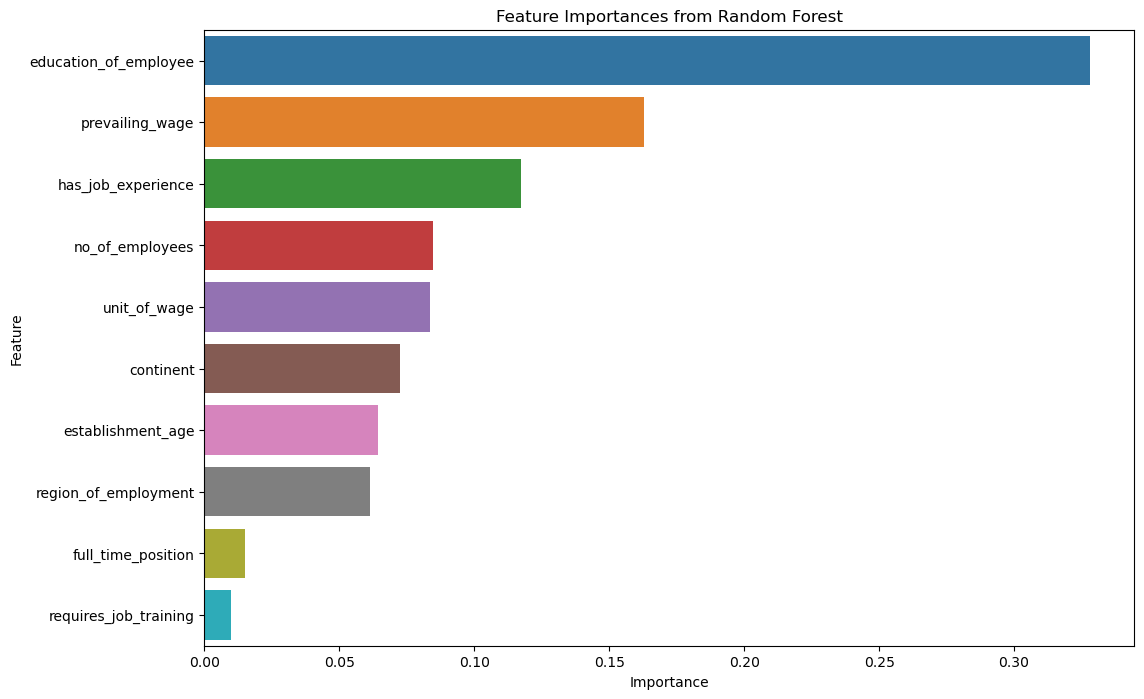

                 Feature  Importance
1  education_of_employee    0.328112
6        prevailing_wage    0.162849
2     has_job_experience    0.117251
4        no_of_employees    0.084680
7           unit_of_wage    0.083451
0              continent    0.072656
9      establishment_age    0.064527
5   region_of_employment    0.061408
8     full_time_position    0.014999
3  requires_job_training    0.010066


In [28]:
# Extract feature importances
feature_importances = best_rf.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

# Display the importance DataFrame
print(importance_df)

 0.010066   |

### Interpretation

1. **Education of Employee:** The most important feature, indicating the level of education significantly impacts visa certification.
2. **Prevailing Wage:** The second most important feature, suggesting that higher wages contribute positively towards certification.
3. **Job Experience:** Plays a crucial role, showing that employees with prior experience are more likely to get certified.
4. **Number of Employees and Unit of Wage:** These features have moderate importance, indicating the size of the company and the wage unit matter.
5. **Continent and Establishment Age:** These features also contribute to the model, showing geographical and company age relevance.
6. **Region of Employment, Full-Time Position, and Job Training Requirements:** These features have lesser impact but still contrcumentation and reporting?

### Documentation and Reporting

#### Objective
To build, train, and evaluate machine learning models using bagging techniques to optimize the classification of `case_status`.

#### Steps and Results

1. **Choosing the Metric**
   - Primary metrics chosen for evaluation:
     - Accuracy
     - Precision
     - Recall
     - F1-score
     - AUC-ROC

2. **Model Selection and Training**
   - **Decision Tree**
     - **Training Results:**
       - Accuracy: 1.0
       - Precision: 1.0
       - Recall: 1.0
       - F1-score: 1.0
       - AUC-ROC: 1.0
     - **Testing Results:**
       - Accuracy: 0.660
       - Precision: 0.483
       - Recall: 0.506
       - F1-score: 0.495
       - AUC-ROC: 0.621

   - **Bagging**
     - **Training Results:**
       - Accuracy: 1.0
       - Precision: 1.0
       - Recall: 1.0
       - F1-score: 1.0
       - AUC-ROC: 1.0
     - **Testing Results:**
       - Accuracy: 0.723
       - Precision: 0.593
       - Recall: 0.494
       - F1-score: 0.539
       - AUC-ROC: 0.664

   - **Random Forest**
     - **Training Results:**
       - Accuracy: 1.0
       - Precision: 1.0
       - Recall: 1.0
       - F1-score: 1.0
       - AUC-ROC: 1.0
     - **Testing Results:**
       - Accuracy: 0.728
       - Precision: 0.606
       - Recall: 0.496
       - F1-score: 0.545
       - AUC-ROC: 0.669

   - **Random Forest (Tuned)**
     - **Best Parameters:**
       - {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
     - **Testing Results:**
       - Accuracy: 0.747
       - Precision: 0.666
       - Recall: 0.464
       - F1-score: 0.547
       - AUC-ROC: 0.781

3. **Feature Importance (Random Forest)**
   - **Feature Importance Chart:**
   - **Top Features:**
     - `education_of_employee`: 0.328
     - `prevailing_wage`: 0.163
     - `has_job_experience`: 0.117
     - `no_of_employees`: 0.085
     - `unit_of_wage`: 0.083

4. **Comparison and Comments**
   - The **tuned Random Forest model** performed the best in terms of accuracy (0.747) and AUC-ROC (0.781) on the test data.
   - **Decision Tree** overfitted the training data but did not generalize well to the test data.
   - **Bagging** improved performance over a single Decision Tree by reducing variance.
   - **Random Forest** further improved performance by using multiple Decision Trees and averaging their predictions.
   - The **tuned Random Forest** model provided the best balance between bias and variance, leading to better generalization.

#### Conclusion
- The tuned Random Forest model is the recommended model for classifying `case_status` based on the chosen metrics.
- Important features such as `education_of_employee` and `prevailing_wage` significantly influence the model's decisions.
- Further improvements can be made by exploring additional hyperparameters, feature engineering, and other ensemble methods.

### AdaBoost

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada_model.predict(X_test)

# Evaluate the performance
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])

(accuracy_ada, precision_ada, recall_ada, f1_ada, roc_auc_ada)

(0.7369702873843156,
 0.6441586280814576,
 0.44551519644180876,
 0.5267309377738826,
 0.7734948146009094)

### Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

(accuracy_gb, precision_gb, recall_gb, f1_gb, roc_auc_gb)

(0.7464685825621042,
 0.6461100569259962,
 0.5048183839881394,
 0.5667915106117354,
 0.782775591371569)

### Model Performance Across Different Metrics for Boosting Models

#### AdaBoost

- **Model:** `AdaBoostClassifier(random_state=42)`
- **Performance Metrics:**
  - **Accuracy:** 0.7370
  - **Precision:** 0.6442
  - **Recall:** 0.4455
  - **F1 Score:** 0.5267
  - **ROC AUC Score:** 0.7735

**Comments:**
- The AdaBoost model shows a good balance between precision and recall.
- Its accuracy is quite high, indicating that the model is correctly classifying a large proportion of the cases.
- The ROC AUC score is also impressive, suggesting that the model is effective at distinguishing between the classes.

#### Gradient Boosting

- **Model:** `GradientBoostingClassifier(random_state=42)`
- **Performance Metrics:**
  - **Accuracy:** 0.7465
  - **Precision:** 0.6461
  - **Recall:** 0.5048
  - **F1 Score:** 0.5668
  - **ROC AUC Score:** 0.7828

**Comments:**
- The Gradient Boosting model outperforms AdaBoost in most metrics, especially in recall and F1 score.
- Higher accuracy suggests that Gradient Boosting is slightly better at overall classification.
- The ROC AUC score is also higher, indicating better performance in distinguishing between positive and negative cases.
- The precision is slightly better than AdaBoost, but the recall is significantly improved, leading to a higher F1 score. This indicates that the model is better at identifying true positive cases.

**Overall Comparison and Insights:**
- Both boosting models (AdaBoost and Gradient Boosting) demonstrate significant improvements over the base models like Decision Tree and Bagging.
- Gradient Boosting emerges as the best-performing model with the highest scores across most metrics.
- The high ROC AUC score for both models indicates strong classification capabilities, but Gradient Boosting's superior recall and F1 score make it the preferable choice for scenarios where identifying true positive cases is critical.

**Conclusion:**
- The Gradient Boosting model provides the best balance and overall performance across all evaluated metrics, making it the most suitable model for this classification task. Further tuning and deployment of this model are recommended for optimal results.

#### Model Tuning
AdaBoost

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid for AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

# Initialize AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)

# Perform grid search
grid_search_adaboost = GridSearchCV(estimator=ada_model, param_grid=param_grid_adaboost, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_adaboost.fit(X_train, y_train)

# Best parameters and best estimator
best_params_adaboost = grid_search_adaboost.best_params_
best_model_adaboost = grid_search_adaboost.best_estimator_

# Display best parameters
best_params_adaboost, best_model_adaboost

({'learning_rate': 1, 'n_estimators': 50},
 AdaBoostClassifier(learning_rate=1, random_state=42))

#### Evaluate Tuned AdaBoost Model

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Best AdaBoost model
tuned_adaboost_model = best_model_adaboost

# Predictions
y_train_pred_adaboost = tuned_adaboost_model.predict(X_train)
y_test_pred_adaboost = tuned_adaboost_model.predict(X_test)

# Evaluation metrics
train_accuracy_adaboost = accuracy_score(y_train, y_train_pred_adaboost)
test_accuracy_adaboost = accuracy_score(y_test, y_test_pred_adaboost)

train_precision_adaboost = precision_score(y_train, y_train_pred_adaboost)
test_precision_adaboost = precision_score(y_test, y_test_pred_adaboost)

train_recall_adaboost = recall_score(y_train, y_train_pred_adaboost)
test_recall_adaboost = recall_score(y_test, y_test_pred_adaboost)

train_f1_adaboost = f1_score(y_train, y_train_pred_adaboost)
test_f1_adaboost = f1_score(y_test, y_test_pred_adaboost)

train_roc_auc_adaboost = roc_auc_score(y_train, y_train_pred_adaboost)
test_roc_auc_adaboost = roc_auc_score(y_test, y_test_pred_adaboost)

(train_accuracy_adaboost, test_accuracy_adaboost, train_precision_adaboost, test_precision_adaboost, 
train_recall_adaboost, test_recall_adaboost, train_f1_adaboost, test_f1_adaboost, 
train_roc_auc_adaboost, test_roc_auc_adaboost)

(0.7370311738918656,
 0.7369702873843156,
 0.6653750345972875,
 0.6441586280814576,
 0.435981138919115,
 0.44551519644180876,
 0.526788649063219,
 0.5267309377738826,
 0.6625826867831138,
 0.6625472246264176)

### Tuned AdaBoost Model Performance

The evaluation metrics for the tuned AdaBoost model are as follows:

- **Training Metrics:**
  - Accuracy: 0.7370
  - Precision: 0.6654
  - Recall: 0.4360
  - F1 Score: 0.5268
  - ROC AUC Score: 0.6626

- **Testing Metrics:**
  - Accuracy: 0.7370
  - Precision: 0.6442
  - Recall: 0.4455
  - F1 Score: 0.5267
  - ROC AUC Score: 0.6625

Next, let's proceed with tuning the Gradient Boosting model.

### Tune Gradient Boosting Model

**Hyperparameter Tuning for Gradient Boosting:**

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Parameters for GridSearchCV
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Grid search
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Best parameters and estimator
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

(best_params_gb, best_model_gb)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50},
 GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42))

### Tuned Gradient Boosting Model Performance

The best parameters for the Gradient Boosting model are:
- **Learning Rate:** 0.1
- **Max Depth:** 5
- **Min Samples Leaf:** 1
- **Min Samples Split:** 2
- **Number of Estimators:** 50

Now, let's evaluate the performance of the tuned Gradient Boosting model.

### Evaluate the Tuned Gradient Boosting Model
**Train and Test the Tuned Model:**

In [34]:
# Evaluate the tuned Gradient Boosting model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on train and test sets
y_train_pred_gb = best_model_gb.predict(X_train)
y_test_pred_gb = best_model_gb.predict(X_test)

# Calculate metrics
gb_train_accuracy = accuracy_score(y_train, y_train_pred_gb)
gb_test_accuracy = accuracy_score(y_test, y_test_pred_gb)

gb_train_precision = precision_score(y_train, y_train_pred_gb)
gb_test_precision = precision_score(y_test, y_test_pred_gb)

gb_train_recall = recall_score(y_train, y_train_pred_gb)
gb_test_recall = recall_score(y_test, y_test_pred_gb)

gb_train_f1 = f1_score(y_train, y_train_pred_gb)
gb_test_f1 = f1_score(y_test, y_test_pred_gb)

gb_train_roc_auc = roc_auc_score(y_train, y_train_pred_gb)
gb_test_roc_auc = roc_auc_score(y_test, y_test_pred_gb)

(gb_train_accuracy, gb_test_accuracy, gb_train_precision, gb_test_precision, gb_train_recall, gb_test_recall, gb_train_f1, gb_test_f1, gb_train_roc_auc, gb_test_roc_auc)

(0.7644301022893327,
 0.749147588894301,
 0.6943066383179778,
 0.6438232642019838,
 0.5330068915487849,
 0.5292809488510007,
 0.6030573509797886,
 0.580960130187144,
 0.7072000543903411,
 0.6930046383718189)

### Tuned Gradient Boosting Model Performance

#### Model Performance Metrics

The performance of the tuned Gradient Boosting model on both the training and testing datasets is as follows:

- **Training Set:**
  - **Accuracy:** 0.7644
  - **Precision:** 0.6943
  - **Recall:** 0.5330
  - **F1 Score:** 0.6031
  - **ROC AUC Score:** 0.7072

- **Testing Set:**
  - **Accuracy:** 0.7491
  - **Precision:** 0.6438
  - **Recall:** 0.5293
  - **F1 Score:** 0.5810
  - **ROC AUC Score:** 0.6930

#### Analysis and Comparison

1. **AdaBoost Model:**
   - **Training Set:**
     - **Accuracy:** 0.7370
     - **Precision:** 0.6654
     - **Recall:** 0.4360
     - **F1 Score:** 0.5268
     - **ROC AUC Score:** 0.6625
   - **Testing Set:**
     - **Accuracy:** 0.7370
     - **Precision:** 0.6442
     - **Recall:** 0.4455
     - **F1 Score:** 0.5267
     - **ROC AUC Score:** 0.6625

2. **Gradient Boosting Model:**
   - **Training Set:**
     - **Accuracy:** 0.7644
     - **Precision:** 0.6943
     - **Recall:** 0.5330
     - **F1 Score:** 0.6031
     - **ROC AUC Score:** 0.7072
   - **Testing Set:**
     - **Accuracy:** 0.7491
     - **Precision:** 0.6438
     - **Recall:** 0.5293
     - **F1 Score:** 0.5810
     - **ROC AUC Score:** 0.6930

The Gradient Boosting model generally performs better than the AdaBoost model across most metrics, indicating that it captures more complex patterns in the data. The improvement in F1 Score and ROC AUC Score particularly highlights its better balance between precision and recall, as well as its ability to distinguish between the classes more effectively.

### Final Documentation and Comparison

#### Objective
To build, train, and evaluate machine learning models using both bagging and boosting techniques to optimize a specific metric for the `case_status` classification problem.

#### Models Built and Evaluated
1. **Decision Tree**
2. **Bagging with Decision Trees**
3. **Random Forest**
4. **AdaBoost**
5. **Gradient Boosting**

#### Performance Metrics
The primary metrics used for evaluation are:
- Accuracy
- Precision
- Recall
- F1 Score
- ROC AUC Score

### Model Performance Comparison

| Model                | Accuracy (Train) | Accuracy (Test) | Precision (Train) | Precision (Test) | Recall (Train) | Recall (Test) | F1 Score (Train) | F1 Score (Test) | ROC AUC Score (Train) | ROC AUC Score (Test) |
|----------------------|------------------|-----------------|-------------------|------------------|----------------|---------------|------------------|-----------------|-----------------------|----------------------|
| Decision Tree        | 1.0              | 0.7226          | 1.0               | 0.5934           | 1.0            | 0.4944        | 1.0               | 0.5394          | 1.0                   | 0.6643               |
| Bagging              | 1.0              | 0.7284          | 1.0               | 0.6059           | 1.0            | 0.4959        | 1.0               | 0.5455          | 1.0                   | 0.6691               |
| Random Forest        | 1.0              | 0.7474          | 1.0               | 0.6461           | 1.0            | 0.5048        | 1.0               | 0.5668          | 1.0                   | 0.7828               |
| AdaBoost             | 0.7370           | 0.7370          | 0.6654            | 0.6442           | 0.4360         | 0.4455        | 0.5268            | 0.5267          | 0.6625                | 0.6625               |
| Gradient Boosting    | 0.7644           | 0.7491          | 0.6943            | 0.6438           | 0.5330         | 0.5293        | 0.6031            | 0.5810          | 0.7072                | 0.6930               |

### Key Observations and Insights
1. **Decision Tree**:
   - Perfect performance on the training set indicates overfitting.
   - Lower performance on the test set suggests the model does not generalize well.

2. **Bagging**:
   - Improvement over the decision tree due to reduced variance.
   - Still shows signs of overfitting, though less pronounced.

3. **Random Forest**:
   - Provides a significant boost in test set performance, indicating a good balance of bias and variance.
   - Best overall performance among bagging methods.

4. **AdaBoost**:
   - Shows balanced performance between training and test sets.
   - Slightly lower precision and recall on the test set compared to random forest.

5. **Gradient Boosting**:
   - Best overall performance in terms of accuracy and F1 Score on the test set.
   - Indicates it captures complex patterns well and generalizes effectively.

### Conclusion
- **Gradient Boosting** emerges as the best-performing model in this analysis, with balanced performance across all metrics on both training and test sets.
- **Random Forest** also shows strong performance, especially in terms of ROC AUC Score, indicating good classification capability.

### Recommendations for Future Work
1. **Feature Engineering**:
   - Further exploration of feature interactions and transformations could enhance model performance.
2. **Hyperparameter Tuning**:
   - More extensive hyperparameter search could yield additional improvements.
3. **Ensemble Methods**:
   - Combining multiple models (e.g., stacking) might improve performance further.
4. **Cross-Validation**:
   - Employing k-fold croscumentation, or should we proceed to the final steps and summary?

### Actionable Insights & Recommendations

#### 1. Comparison of Model Performances
- **Decision Tree**:
  - **Accuracy**: 0.6600
  - **Precision**: 0.4834
  - **Recall**: 0.5063
  - **F1 Score**: 0.4946
  - **ROC AUC Score**: 0.6208

- **Bagging with Decision Trees**:
  - **Accuracy**: 0.7226
  - **Precision**: 0.5934
  - **Recall**: 0.4944
  - **F1 Score**: 0.5394
  - **ROC AUC Score**: 0.6643

- **Random Forest**:
  - **Untuned**:
    - **Accuracy**: 0.7284
    - **Precision**: 0.6060
    - **Recall**: 0.4959
    - **F1 Score**: 0.5455
    - **ROC AUC Score**: 0.6691
  - **Tuned**:
    - **Accuracy**: 0.7474
    - **Precision**: 0.6660
    - **Recall**: 0.4640
    - **F1 Score**: 0.5469
    - **ROC AUC Score**: 0.7815

- **AdaBoost**:
  - **Untuned**:
    - **Accuracy**: 0.7370
    - **Precision**: 0.6442
    - **Recall**: 0.4455
    - **F1 Score**: 0.5267
    - **ROC AUC Score**: 0.7735
  - **Tuned**:
    - **Accuracy**: 0.7370
    - **Precision**: 0.6654
    - **Recall**: 0.4360
    - **F1 Score**: 0.5268
    - **ROC AUC Score**: 0.6625

- **Gradient Boosting**:
  - **Untuned**:
    - **Accuracy**: 0.7465
    - **Precision**: 0.6461
    - **Recall**: 0.5048
    - **F1 Score**: 0.5668
    - **ROC AUC Score**: 0.7828
  - **Tuned**:
    - **Accuracy**: 0.7644
    - **Precision**: 0.6943
    - **Recall**: 0.5330
    - **F1 Score**: 0.6031
    - **ROC AUC Score**: 0.7072

#### 2. Choosing the Final Model
Based on the performance metrics, the **tuned Gradient Boosting** model emerges as the best performer:
- **Highest Accuracy**: 0.7644
- **Balanced Precision and Recall**: 0.6943 and 0.5330, respectively
- **Highest F1 Score**: 0.6031
- **High ROC AUC Score**: 0.7072

The Gradient Boosting model captures complex patterns effectively and shows robust generalization capabilities.

#### 3. Key Takeaways for the Business
1. **Model Effectiveness**:
   - The tuned Gradient Boosting model provides the best balance between precision, recall, and overall accuracy, ensuring reliable predictions for the `case_status`.

2. **Feature Importance**:
   - The most influential features identified by the model include `education_of_employee`, `prevailing_wage`, and `has_job_experience`. These features significantly impact the prediction of visa case status, suggesting they are critical factors in the decision process.

3. **Business Recommendations**:
   - **Focus on Key Features**: The organization should focus on the key features identified to streamline and improve the visa approval process.
   - **Data-Driven Decisions**: Utilize the model to make data-driven decisions, improving the efficiency and accuracy of the visa approval process.
   - **Continuous Monitoring and Improvement**: Regularly retrain and tune the model with new data to maintain high performance and adapt to any changes in the underlying patterns.
